In [1]:
import csv

print("tab delimited stock prices:")

def process(date, symbol, price):
    print(date, symbol, price)


with open('tab_delimited_stock_prices.txt', 'r', encoding='utf8',newline='') as f:
    reader = csv.reader(f, delimiter='\t')
    # reader = csv.reader(codecs.iterdecode(f, 'utf-8'), delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)

tab delimited stock prices:
6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5
6/19/2014 AAPL 91.86
6/19/2014 MSFT 41.51
6/19/2014 FB 64.34


In [2]:
print("colon delimited stock prices:")

with open('colon_delimited_stock_prices.txt', 'r', encoding='utf8',newline='') as f:
    reader = csv.DictReader(f, delimiter=':')
    # reader = csv.DictReader(codecs.iterdecode(f, 'utf-8'), delimiter=':')
    for row in reader:
        date = row["date"]
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])
        process(date, symbol, closing_price)


colon delimited stock prices:
6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5


In [3]:
print("writing out comma_delimited_stock_prices.txt")

today_prices = { 'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5 }

with open('comma_delimited_stock_prices.txt','w', encoding='utf8',newline='') as f:
    writer = csv.writer(f, delimiter=',')
    for stock, price in today_prices.items():
        writer.writerow([stock, price])

writing out comma_delimited_stock_prices.txt


In [9]:
from bs4 import BeautifulSoup
import requests
# 실행전 conda install bs4 requests

print("BeautifulSoup")
html = requests.get("http://www.example.com").text
soup = BeautifulSoup(html)
soup

BeautifulSoup


/usr/local/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


<!DOCTYPE html>
<html>
<head>
<title>Example Domain</title>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 50px;
        background-color: #fff;
        border-radius: 1em;
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        body {
            background-color: #fff;
        }
        div {
            width: auto;
            margin: 0 auto;
            border-radius: 0;
            padding: 1em;
        }
    }
    </style>
</head>
<body>
<div>
<h1>Example Domain</h1>
<p>This domain is established to be used for illu

In [16]:
url = "http://shop.oreilly.com/category/browse-subjects/" + \
           "data.do?sortby=publicationDate&page=1"

#pip install html5lib
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

soup

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html><head>
        

























  









<!--Janrain SSO JavaScripts -->


<!-- Script added to resolve JS error coming on IE-8 for Janrain login -->
<script>
	document.getElementsByClassName = 
	Element.prototype.getElementsByClassName = function(class_names) {
		// Turn input in a string, prefix space for later space-dot substitution
		class_names = (' ' + class_names)
			// Escape special characters
			.replace(/[~!@$%^&*()_+\-=,./';:"?><[\]{}|`#]/g, '\$&')
			// Normalize whitespace, right-trim
			.replace(/\s*(\s|$)/g, '$1')
			// Replace spaces with dots for querySelectorAll
			.replace(/\s/g, '.');
		return this.querySelectorAll(class_names);
	};
</script>



  
  
    
      
    
  


<meta content="SKYPE_TOOLBAR_PARSER_COMPATIBLE" name="SKYPE_TOOLBAR"/>

<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>



  
  
     <meta content="summar

In [17]:
tds = soup("td","thumbtext")
len(tds)

30

In [18]:
def is_video(td):
    """it's a video if it has exactly one pricelabel, and if
    the stripped text inside that pricelabel starts with 'Video'"""
    pricelabels = td('span', 'pricelabel')
    return (len(pricelabels) == 1 and
            pricelabels[0].text.strip().startswith("Video"))



In [19]:
len([td for td in tds if not is_video(td)])

19

In [20]:
import re

def book_info(td):
    """given a BeautifulSoup <td> Tag representing a book,
    extract the book's details and return a dict"""

    title = td.find("div", "thumbheader").a.text
    by_author = td.find('div', 'AuthorName').text
    authors = [x.strip() for x in re.sub("^By ", "", by_author).split(",")]
    isbn_link = td.find("div", "thumbheader").a.get("href")
    isbn = re.match("/product/(.*)\.do", isbn_link).groups()[0]
    date = td.find("span", "directorydate").text.strip()

    return {
        "title" : title,
        "authors" : authors,
        "isbn" : isbn,
        "date" : date
    }

In [21]:

([book_info(td) for td in tds if not is_video(td)])

[{'authors': ['Tom Hope', 'Yehezkel S. Resheff', 'Itay Lieder'],
  'date': 'January 2017',
  'isbn': '0636920063698',
  'title': 'Learning TensorFlow'},
 {'authors': ['Ved Antani', 'Stoyan Stefanov'],
  'date': 'January 2017',
  'isbn': '9781785880568',
  'title': 'Object-Oriented JavaScript, 3rd Edition'},
 {'authors': ['Richard M Reese', 'Jennifer L. Reese'],
  'date': 'January 2017',
  'isbn': '9781785280115',
  'title': 'Java for Data Science'},
 {'authors': ['Suresh K. Gorakala'],
  'date': 'December 2016',
  'isbn': '9781785884856',
  'title': 'Building Recommendation Engines'},
 {'authors': ['Ashish Kumar', 'Avinash Paul'],
  'date': 'December 2016',
  'isbn': '9781783551811',
  'title': 'Mastering Text Mining with R'},
 {'authors': ['Padma Priya Chitturi'],
  'date': 'December 2016',
  'isbn': '9781785880100',
  'title': 'Apache Spark for Data Science Cookbook'},
 {'authors': ['Ted Malaska'],
  'date': 'December 2016',
  'isbn': '0636920053255',
  'title': 'Solutions Architectu

In [22]:
from time import sleep
from bs4 import BeautifulSoup # 실행전 conda install html5lib
import requests, re

def scrape(num_pages=31):
    base_url = "http://shop.oreilly.com/category/browse-subjects/" + \
           "data.do?sortby=publicationDate&page="

    books = []

    for page_num in range(1, num_pages + 1):
        print("souping page", page_num)
        url = base_url + str(page_num)
        soup = BeautifulSoup(requests.get(url).text, 'html5lib')

        for td in soup('td', 'thumbtext'):
            if not is_video(td):
                books.append(book_info(td))

        # now be a good citizen and respect the robots.txt!
        sleep(30)

    return books

In [ ]:
books = scrape(50)
books

souping page 1
souping page 2
souping page 3
souping page 4
souping page 5
souping page 6
souping page 7
souping page 8
souping page 9
souping page 10
souping page 11
souping page 12
souping page 13
souping page 14
souping page 15
souping page 16
souping page 17
souping page 18
souping page 19
souping page 20
souping page 21
souping page 22
souping page 23
souping page 24
souping page 25
souping page 26
souping page 27
souping page 28
souping page 29
souping page 30
souping page 31
souping page 32
souping page 33
souping page 34
souping page 35
souping page 36
souping page 37
souping page 38
souping page 39
souping page 40
souping page 41
souping page 42


In [24]:
def get_year(book):
    """book["date"] looks like 'November 2014' so we need to
    split on the space and then take the second piece"""
    return int(book["date"].split()[1])

In [25]:
from collections import Counter

def plot_years(plt, books):
    # 2014 is the last complete year of data (when I ran this)
    year_counts = Counter(get_year(book) for book in books
                          if get_year(book) <= 2014)

    years = sorted(year_counts)
    book_counts = [year_counts[year] for year in years]
    plt.bar([x - 0.5 for x in years], book_counts)
    plt.xlabel("year")
    plt.ylabel("# of data books")
    plt.title("Data is Big!")
    plt.show()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


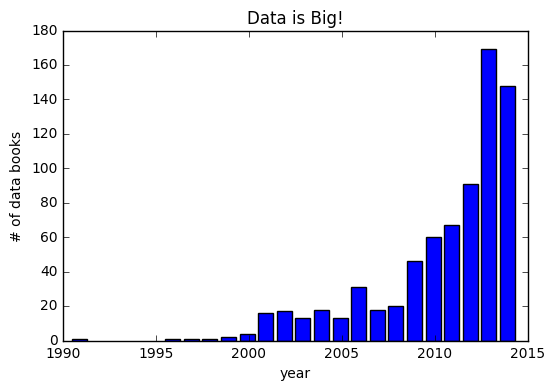

In [26]:
import matplotlib.pyplot as plt
%pylab inline

plot_years(plt, books)

In [27]:
import json

print("parsing json")

serialized = """{ "title" : "Data Science Book",
                      "author" : "Joel Grus",
                      "publicationYear" : 2014,
                      "topics" : [ "data", "science", "data science"] }"""

    # parse the JSON to create a Python object
deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
    print(deserialized)


parsing json
{'author': 'Joel Grus', 'title': 'Data Science Book', 'topics': ['data', 'science', 'data science'], 'publicationYear': 2014}


In [28]:
from dateutil.parser import parse

print("GitHub API")
endpoint = "https://api.github.com/users/joelgrus/repos"
# endpoint = "https://api.github.com/users/Insight-book/repos"
#endpoint 의 자신의 github 주소를 넣어볼 것을 권장함

repos = json.loads(requests.get(endpoint).text)

dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

print("dates", dates)
print("month_counts", month_counts)
print("weekday_count", weekday_counts)

last_5_repositories = sorted(repos,
                                 key=lambda r: r["created_at"],
                                 reverse=True)[:5]

print("last five languages", [repo["language"] for repo in last_5_repositories])

GitHub API
dates [datetime.datetime(2013, 7, 5, 2, 2, 28, tzinfo=tzutc()), datetime.datetime(2013, 11, 15, 5, 33, 22, tzinfo=tzutc()), datetime.datetime(2012, 9, 18, 4, 20, 23, tzinfo=tzutc()), datetime.datetime(2016, 7, 19, 17, 34, 31, tzinfo=tzutc()), datetime.datetime(2015, 11, 11, 14, 15, 36, tzinfo=tzutc()), datetime.datetime(2016, 5, 31, 14, 33, 6, tzinfo=tzutc()), datetime.datetime(2015, 6, 30, 0, 33, 3, tzinfo=tzutc()), datetime.datetime(2013, 8, 21, 13, 26, 5, tzinfo=tzutc()), datetime.datetime(2013, 8, 18, 5, 3, 41, tzinfo=tzutc()), datetime.datetime(2015, 7, 30, 1, 54, 55, tzinfo=tzutc()), datetime.datetime(2014, 11, 9, 2, 31, 24, tzinfo=tzutc()), datetime.datetime(2013, 11, 10, 6, 52, 56, tzinfo=tzutc()), datetime.datetime(2015, 4, 8, 1, 1, 47, tzinfo=tzutc()), datetime.datetime(2016, 1, 8, 3, 33, 58, tzinfo=tzutc()), datetime.datetime(2016, 1, 21, 6, 46, 49, tzinfo=tzutc()), datetime.datetime(2013, 7, 1, 3, 36, 23, tzinfo=tzutc()), datetime.datetime(2013, 2, 22, 0, 12, 38,

In [21]:
import requests
from twython import Twython
#pip install twython

# fill these in if you want to use the code

import configparser

config = configparser.ConfigParser()
config.read('twitter_app.conf')

CONSUMER_KEY = config.get("TWITTER_KEY", "CONSUMER_KEY")
CONSUMER_SECRET = config.get("TWITTER_KEY", "CONSUMER_SECRET")
ACCESS_TOKEN = config.get("TWITTER_KEY", "ACCESS_TOKEN")
ACCESS_TOKEN_SECRET = config.get("TWITTER_KEY", "ACCESS_TOKEN_SECRET")

config.sections()

['TWITTER_KEY']

In [22]:
from twython import TwythonStreamer

tweets = []

class MyStreamer(TwythonStreamer):
    """our own subclass of TwythonStreamer that specifies
    how to interact with the stream"""

    def on_success(self, data):
        """what do we do when twitter sends us data?
        here data will be a Python object representing a tweet"""

        # only want to collect English-language tweets
        if data['lang'] == 'en':
            tweets.append(data)

        # stop when we've collected enough
        if len(tweets) >= 1000:
            self.disconnect()

    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()

def call_twitter_search_api():
    twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)
    # search for tweets containing the phrase "data science"
    for status in twitter.search(q='"data science"')["statuses"]:
        user = status["user"]["screen_name"].encode('utf-8')
        text = status["text"].encode('utf-8')
        print(user, ":", text)
        print()
        
def call_twitter_streaming_api():
    stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET,
                        ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

    # starts consuming public statuses that contain the keyword 'data'
    stream.statuses.filter(track='data')

call_twitter_search_api()

b'reclaimifytest' : b'Reclaiming the term \xe2\x80\x9cdata science\xe2\x80\x9d https://t.co/etXTCJtHIF'

b'G0GMANGO' : b'100 free ebooks for signing up 4 #DataScience  newsletters  \nhttps://t.co/ozAphjYi4e'

b'newsycbot' : b'Reclaiming the term \xe2\x80\x9cdata science\xe2\x80\x9d https://t.co/pRBfnZk3nv (cmts https://t.co/yT6W8FAlDa)'

b'ekito' : b"RT @tlse_dasci: et n'oubliez pas, ce soir 3eme rencontre #Kaggle chez @ekito https://t.co/G6Wzh7eJzt https://t.co/lLgzySuzbS"

b'SecNewsBot' : b'Hacker News - Reclaiming the term \xe2\x80\x9cdata science\xe2\x80\x9d https://t.co/FJaC77Swcd'

b'davidpiprof' : b'I got unexpected call from headhunter that I am going to second round to this data science position. With interview next week #p #xfb'

b'my_data_science' : b'Predicting purchases at retail stores using HPE Vertica and Dataiku DSS https://t.co/DtpjSZDE7x #datascience'

b'cremeglobal' : b'Hi all,\n\nThis is our new data science platform which is coming out of beta. We are installing a